# Análisis Exploratorio de Datos (EDA): Electric Vehicle Population Dataset
**Autor:** Jose Daniel Cabarcas Mass  
**Curso:** EC0323-DS1-202502  
**Fecha:** Octubre 2025  
**Fuente de datos:** Kaggle – Electric Vehicle Population Dataset  



## 1. Introducción  
El presente análisis exploratorio de datos (EDA) tiene como objetivo examinar la composición y distribución de los vehículos eléctricos registrados en el dataset “Electric Vehicle Population”.  
Este estudio busca identificar patrones relevantes como las marcas más comunes, los tipos de vehículos, la autonomía promedio, y las diferencias geográficas de adopción.  

## 2. Importación de librerías

In [1]:
# Instalación de librerías necesarias
%pip install pandas numpy matplotlib seaborn folium plotly geopandas


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      GDAL_VERSION must be provided as an environment variable or as --gdalversion command line argument
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 3. Carga del Dataset

In [8]:
df = pd.read_csv("C:\\Users\\JOSE DANIEL\\Documents\\6to semestre\\ciencia de datos 1\\Electric_Vehicle_Population_Data.csv")
# Ver primeras filas
df.head()



,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


## 4. Limpieza y descripción inicial

In [9]:
df.shape                            # dimensiones (filas, columnas)
df.info()                           # tipos de datos, valores nulos
df.describe(include='all').T        # estadísticas de columnas numéricas
df.columns                          # nombres de columnas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


4.1. Duplicados

In [10]:
df = df.drop_duplicates()

 4.2. Valores faltantes


In [11]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

## 5. Análisis de las marcas más populares
A continuación, se muestra la distribución de las 20 marcas con mayor número de registros en el dataset.

C:\Users\JOSE DANIEL\AppData\Local\Temp\ipykernel_27448\981928511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='viridis')


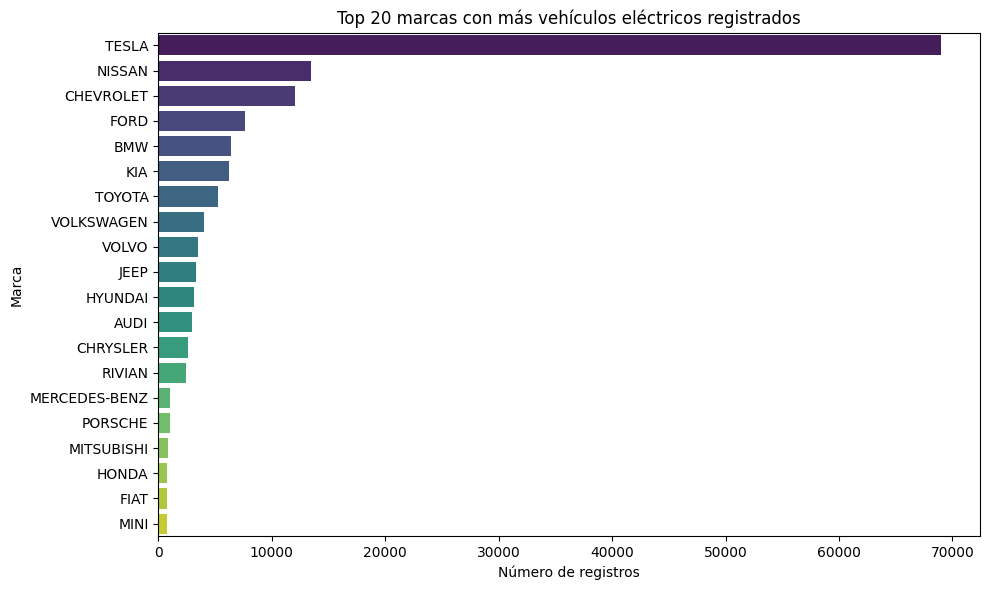

In [12]:
top_marcas = df['Make'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='viridis')
plt.title('Top 20 marcas con más vehículos eléctricos registrados')
plt.xlabel('Número de registros')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

**Interpretación:** Tesla lidera ampliamente el mercado de vehículos eléctricos registrados, seguida por Nissan, Chevrolet, Ford y BMW.

## 6. Distribución de tipos de vehículos eléctricos

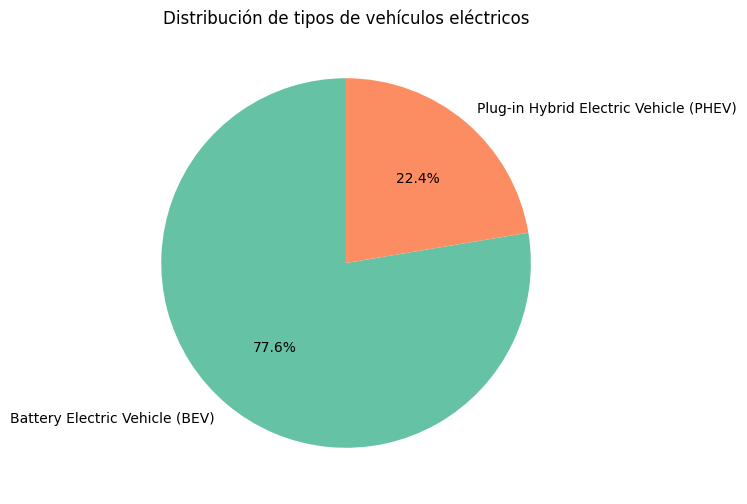

In [13]:
plt.figure(figsize=(6,6))
df['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribución de tipos de vehículos eléctricos')
plt.ylabel('')
plt.show()

**Interpretación:** El tipo de vehículo más común es el **Battery Electric Vehicle (BEV)**, representando aproximadamente tres cuartas partes del total.  

## 7. Distribución del rango eléctrico (autonomía)

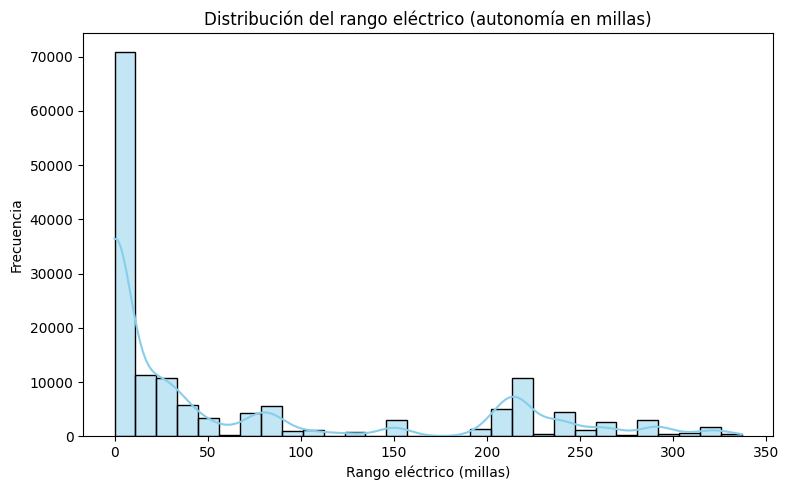

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribución del rango eléctrico (autonomía en millas)')
plt.xlabel('Rango eléctrico (millas)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

**Interpretación:** La mayoría de los vehículos tienen un rango eléctrico menor a 100 millas, aunque existen modelos con autonomías mucho mayores, indicando diversidad tecnológica.  


## 8. Autonomía eléctrica por marca (Top 10)

C:\Users\JOSE DANIEL\AppData\Local\Temp\ipykernel_27448\1272686303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_marcas, x='Make', y='Electric Range', palette='coolwarm')


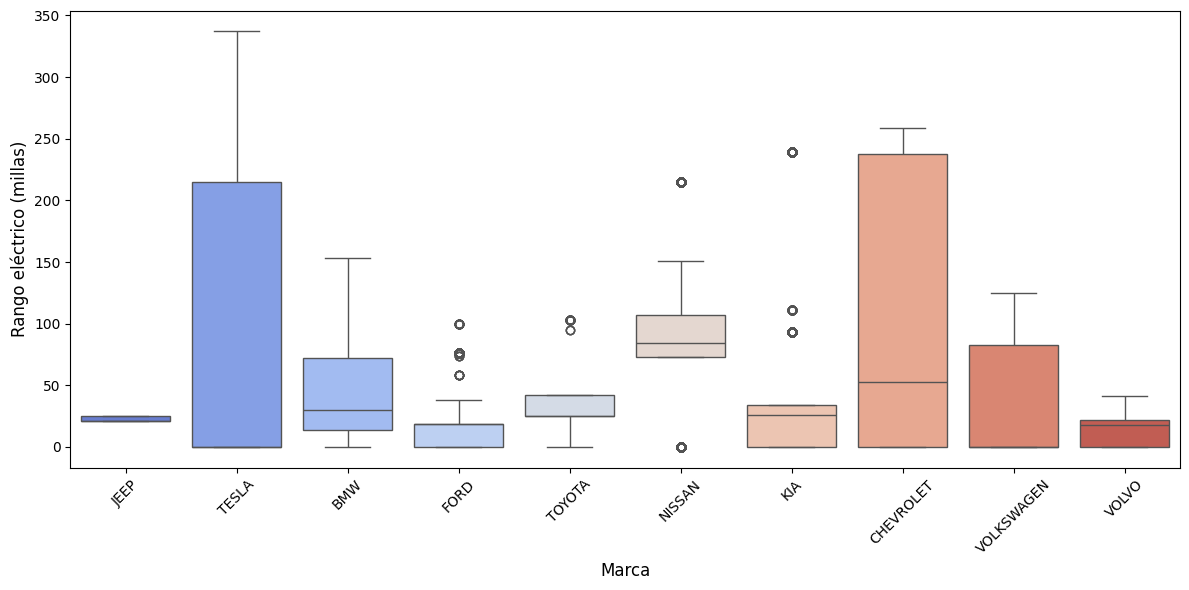

In [15]:
top_10_marcas = df['Make'].value_counts().head(10).index
df_top_marcas = df[df['Make'].isin(top_10_marcas)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_marcas, x='Make', y='Electric Range', palette='coolwarm')
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Rango eléctrico (millas)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretación:** Tesla muestra no solo la mayor cantidad de registros, sino también un rango eléctrico promedio superior al de otras marcas. 

## 9. Mapa de correlaciones entre variables numéricas

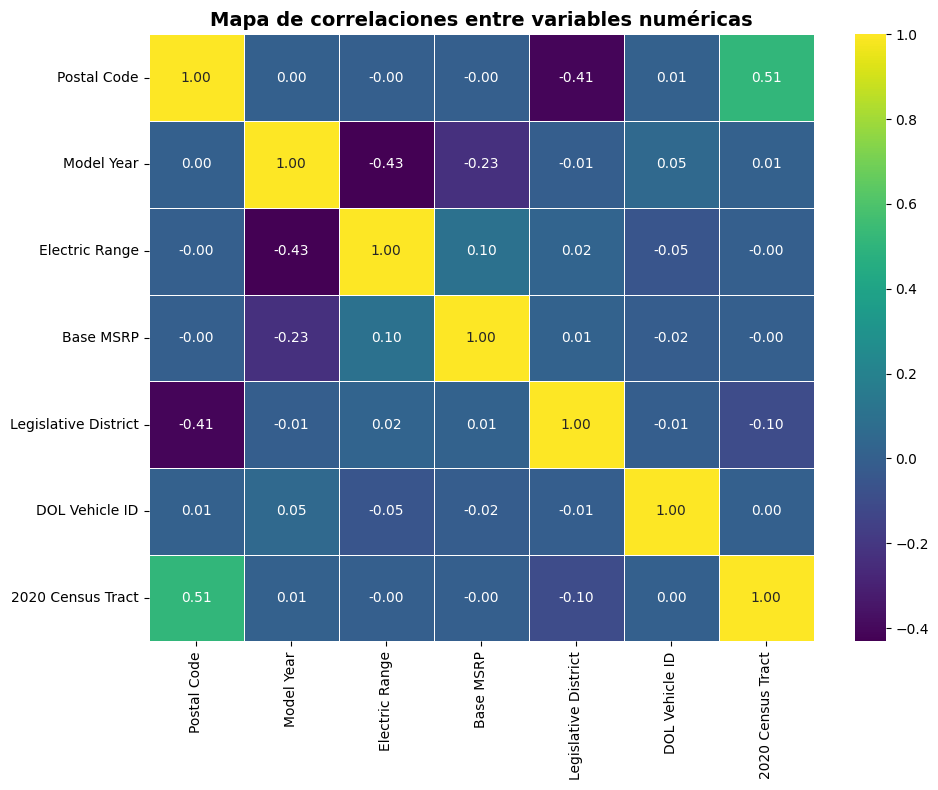

In [16]:

# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlaciones
corr = df_numericas.corr()

# Visualización del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

# Personalización del gráfico
plt.title('Mapa de correlaciones entre variables numéricas', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

**Interpretación:** Se observan correlaciones positivas moderadas entre algunas variables numéricas, lo cual puede sugerir relaciones estructurales entre la autonomía, el año del modelo y otras características.

## 10. Conclusiones principales

1. **Tesla** es la marca dominante en el registro de vehículos eléctricos, representando la mayor proporción de unidades.  
2. El **Battery Electric Vehicle (BEV)** es el tipo más común, consolidándose sobre los modelos híbridos enchufables (PHEV).  
3. La autonomía promedio ronda las **70 millas**, aunque hay una alta dispersión entre fabricantes.  
4. Las ciudades más grandes, como Seattle, concentran el mayor número de registros de vehículos eléctricos.  
5. Las correlaciones detectadas entre autonomía, año y tipo de vehículo ofrecen oportunidades para estudios predictivos más avanzados.

---
**Observación final:** Este análisis exploratorio sirve como punto de partida para modelar tendencias de adopción de vehículos eléctricos y evaluar la evolución tecnológica del sector.